# Pós-graduação em engenharia e qualidade de softwares 
## UNIPE - CIÊNCIA DE DADOS PARA ENGENHEIROS DE SOFTWARE
### 1º Atividade: Análise salarial

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# TO DO: Splitting the dataset into the Training set and Test set
#==================================================================
from sklearn.model_selection import train_test_split
#==================================================================

from sklearn.preprocessing import LabelEncoder

# TO DO: Importar biblioteca de LinearRegression do sklearn
#==================================================================
from sklearn.linear_model import LinearRegression
#==================================================================

# Avaliando os modelos de regressão
from sklearn.metrics import mean_squared_error

# Bibliotecas de vizualização de dados
import matplotlib.pyplot as plt

print(pd.__version__)
print(np.__version__)

2.0.3
1.23.5



## Realizando a carga dos dados


In [2]:
# TO DO: Realizar a carga dos dados do arquivo salarios.csv
#==================================================================
salarios = pd.read_csv('content/salarios.csv')
#==================================================================

In [3]:
salarios.columns

Index(['AnosExperiencia', 'Salario', 'cargo'], dtype='object')

In [5]:
salarios.shape

(30, 3)

In [9]:
# TO DO: Modificar os nomes das colunas para maiúsculas
#==================================================================
salarios.rename(columns={'AnosExperiencia': 'ANOSEXPERIENCIA', 'Salario': 'SALARIO', 'cargo':'CARGO'}, inplace=True)
#==================================================================

In [10]:
salarios.head()

,ANOSEXPERIENCIA,SALARIO,CARGO
0,1.1,39343.0,Analista Financeiros
1,1.3,46205.0,Contador
2,1.5,37731.0,Analista Financeiros
3,2.0,43525.0,Analista de Sistemas
4,2.2,39891.0,Analista de Sistemas


## Análise Exploratória de Dados

Em estatística, a análise exploratória de dados (AED) é uma abordagem à análise de conjuntos de dados de modo a resumir suas características principais, frequentemente com métodos visuais. Um modelo estatístico pode ou não ser usado, mas primariamente a AED tem como objetivo observar o que os dados podem nos dizer além da modelagem formal ou do processo de teste de hipóteses.
Fonte: Wikipedia

In [11]:
#Análise Exploratória dos Dados
# TO DO: Apresentar informações estatísticas descritivas do dataset
salarios.describe()

,ANOSEXPERIENCIA,SALARIO
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## Início da Análise Exploratória de Dados


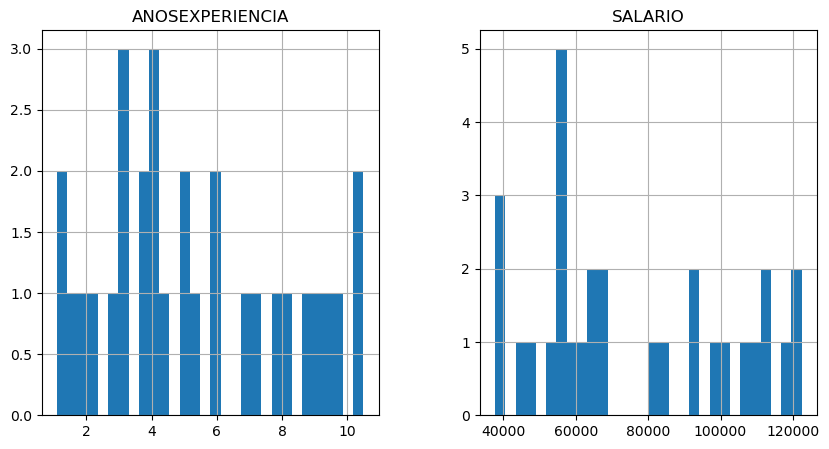

In [12]:
# Visualizando o conjunto de dados
salarios.hist(bins=30, figsize=(10,5))

plt.show()

<Axes: xlabel='ANOSEXPERIENCIA', ylabel='SALARIO'>

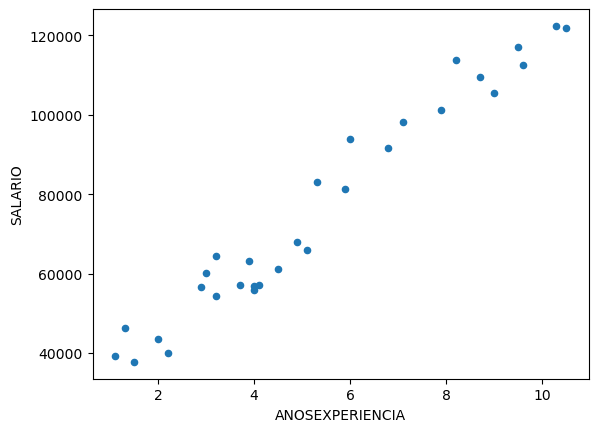

In [14]:
# Objetivo: Visualizar se existe correlação

salarios.plot(kind='scatter',
              x='ANOSEXPERIENCIA',
              y='SALARIO',
#               alpha=0.1 #Parametro para verificação de densidades
             )

In [18]:
# TO DO: Verificar se existe correlação entre as variáveis.
#==================================================================
from scipy.stats import pearsonr 
corr,_= pearsonr(salarios['ANOSEXPERIENCIA'],salarios['SALARIO'])
print('Correlação: %0.3f' % corr)
#==================================================================

Correlação: 0.978


## Resolver valores ausentes - Missing Values

In [19]:
# Identifcando valores ausentes
print(salarios.isnull().sum())

ANOSEXPERIENCIA    0
SALARIO            0
CARGO              0
dtype: int64


In [20]:
salarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ANOSEXPERIENCIA  30 non-null     float64
 1   SALARIO          30 non-null     float64
 2   CARGO            30 non-null     object 
dtypes: float64(2), object(1)
memory usage: 848.0+ bytes


In [23]:
# TO DO: CRIANDO UMA INSTÂNCIA DA CLASSE LabelEncoder do sci-kit learn
#==================================================================
lb = LabelEncoder()
objList = salarios.select_dtypes(include = "object").columns
for obj in objList:    
    salarios[obj] = lb.fit_transform(salarios[obj].astype(str))
#==================================================================

In [24]:
salarios.head()

,ANOSEXPERIENCIA,SALARIO,CARGO
0,1.1,39343.0,0
1,1.3,46205.0,2
2,1.5,37731.0,0
3,2.0,43525.0,1
4,2.2,39891.0,1


In [26]:
from IPython.display import display

X = salarios.loc[:, ['ANOSEXPERIENCIA','CARGO']].values #Variáveis independentes
y = salarios.loc[:, 'SALARIO'].values #Variável dependente - rótulo

print(y)

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [27]:
from sklearn.model_selection import train_test_split

#Separação do dataset em treinamento e tests
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21, 2)
(9, 2)
(21,)
(9,)


## Criando o modelo de Linear Regression para o conjunto de treinamento


In [28]:
# TODO: Instanciar um classificador para Regressão Logística (Logistic Regression)
#==================================================================
linear_regressor = LinearRegression()
#==================================================================
# Treinando o modelo
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [29]:
# Prevendo alguns valores com o conjunto de dados de teste
#Sem indicação de probabilidade
y_pred = linear_regressor.predict(X_test)

y_pred

array([ 40260.6231348 , 123495.14558536,  65188.01243166,  63307.13716864,
       115495.63365571, 107972.13260362, 116912.08216478,  63771.56392258,
        76949.27488736])

## Avaliando Modelos de Regressão

Uma medida de desempenho típica para problemas de **REGRESSÃO** é o **RMSE** (Root Mean Square Error). Ele dá uma idéia de quanto erro o sistema geralmente faz em suas previsões, com um peso maior para erros grandes.


In [30]:
#Valiando o modelo de regressão linear

salario_pred = linear_regressor.predict(X_train)
linear_mse = mean_squared_error(y_test, y_pred)
linear_rmse = np.sqrt(linear_mse)
linear_rmse

4681.734402455417

## Salvando o modelo para uso posterior

In [31]:
import joblib

joblib.dump(linear_regressor, 'linear_regressor_param_001.pkl')

['linear_regressor_param_001.pkl']

## Restaurando o modelo com um novo conjunto de dados (nunca visto antes)

In [34]:
# TO DO: Fazendo a carga
#==================================================================
novo_modelo = pd.read_csv('salarios_novos_colaboradores.csv')
#==================================================================
novo_modelo.head()

,AnosExperiencia,Cargo
0,1.3,Analista Financeiros
1,2.8,Contador
2,3.1,Contador
3,4.1,Analista de Sistemas
4,11.5,Analista de Sistemas


In [41]:
novo_modelo.rename(columns={'AnosExperiencia': 'ANOSEXPERIENCIA','Cargo':'CARGO'}, inplace=True)

## Utilizando o modelo highlander com dados novos

In [42]:
# TO DO: Carga de NOVOS dados
#==================================================================
# CRIANDO UMA INSTÂNCIA DA CLASSE LabelEncoder do sci-kit learn
lb = LabelEncoder()
salarios_novos_colaboradores = novo_modelo.select_dtypes(include = "object").columns
for obj in objList:    
    novo_modelo[obj] = lb.fit_transform(novo_modelo[obj].astype(str))    
#==================================================================

In [44]:
novo_modelo.head()

,ANOSEXPERIENCIA,CARGO
0,1.3,0
1,2.8,2
2,3.1,2
3,4.1,1
4,11.5,1


In [47]:
X1 = novo_modelo.loc[:, ['ANOSEXPERIENCIA','CARGO']].values #Variáveis independentes
salarios_novos_colaboradores = linear_regressor.predict(X1)
salarios_novos_colaboradores 

array([ 38379.74787178,  53438.33409957,  56259.64699411,  65188.01243166,
       134780.3971635 ])